In [51]:
import itertools
import pandas as pd
import numpy as np
from random import gauss

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import het_arch, acorr_ljungbox

from scipy.stats import shapiro
from scipy.stats import probplot

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [52]:
class CFG:
    img_dim1 = 20
    img_dim2 = 10

plt.rcParams.update({'figure.figsize': (CFG.img_dim1, CFG.img_dim2)})

Volatililty Clustering

<AxesSubplot: xlabel='Date'>

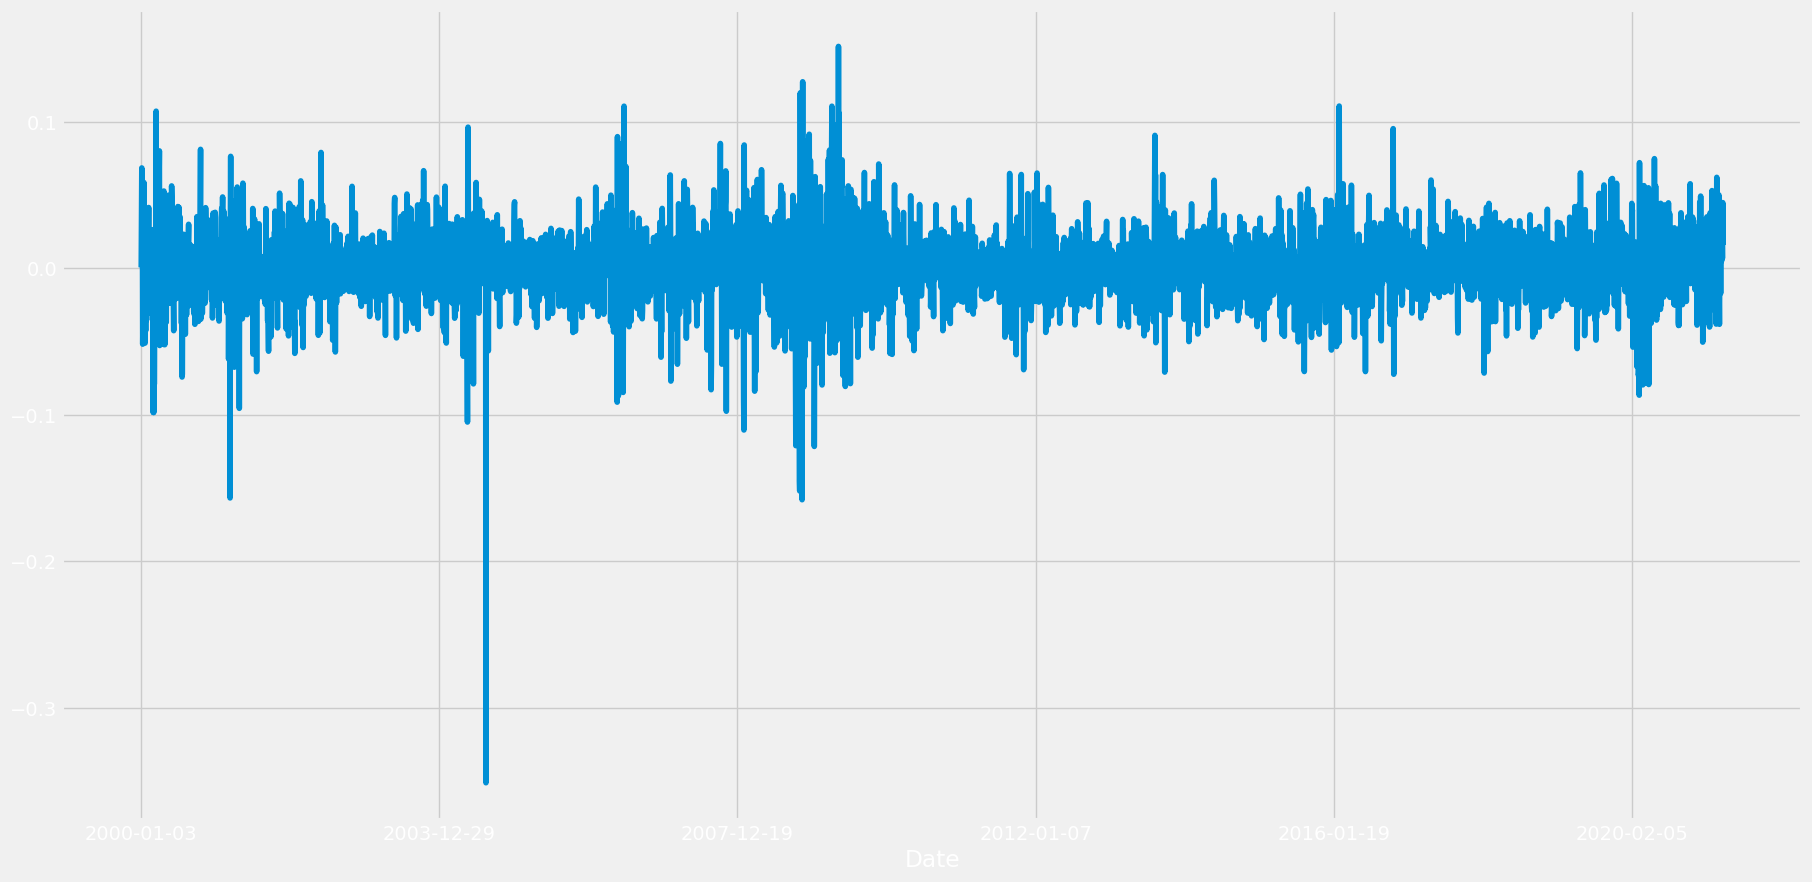

In [53]:
df = pd.read_csv("datasets/TATASTEEL.csv")
df.set_index("Date", drop=False, inplace=True)
df.VWAP.pct_change().plot()

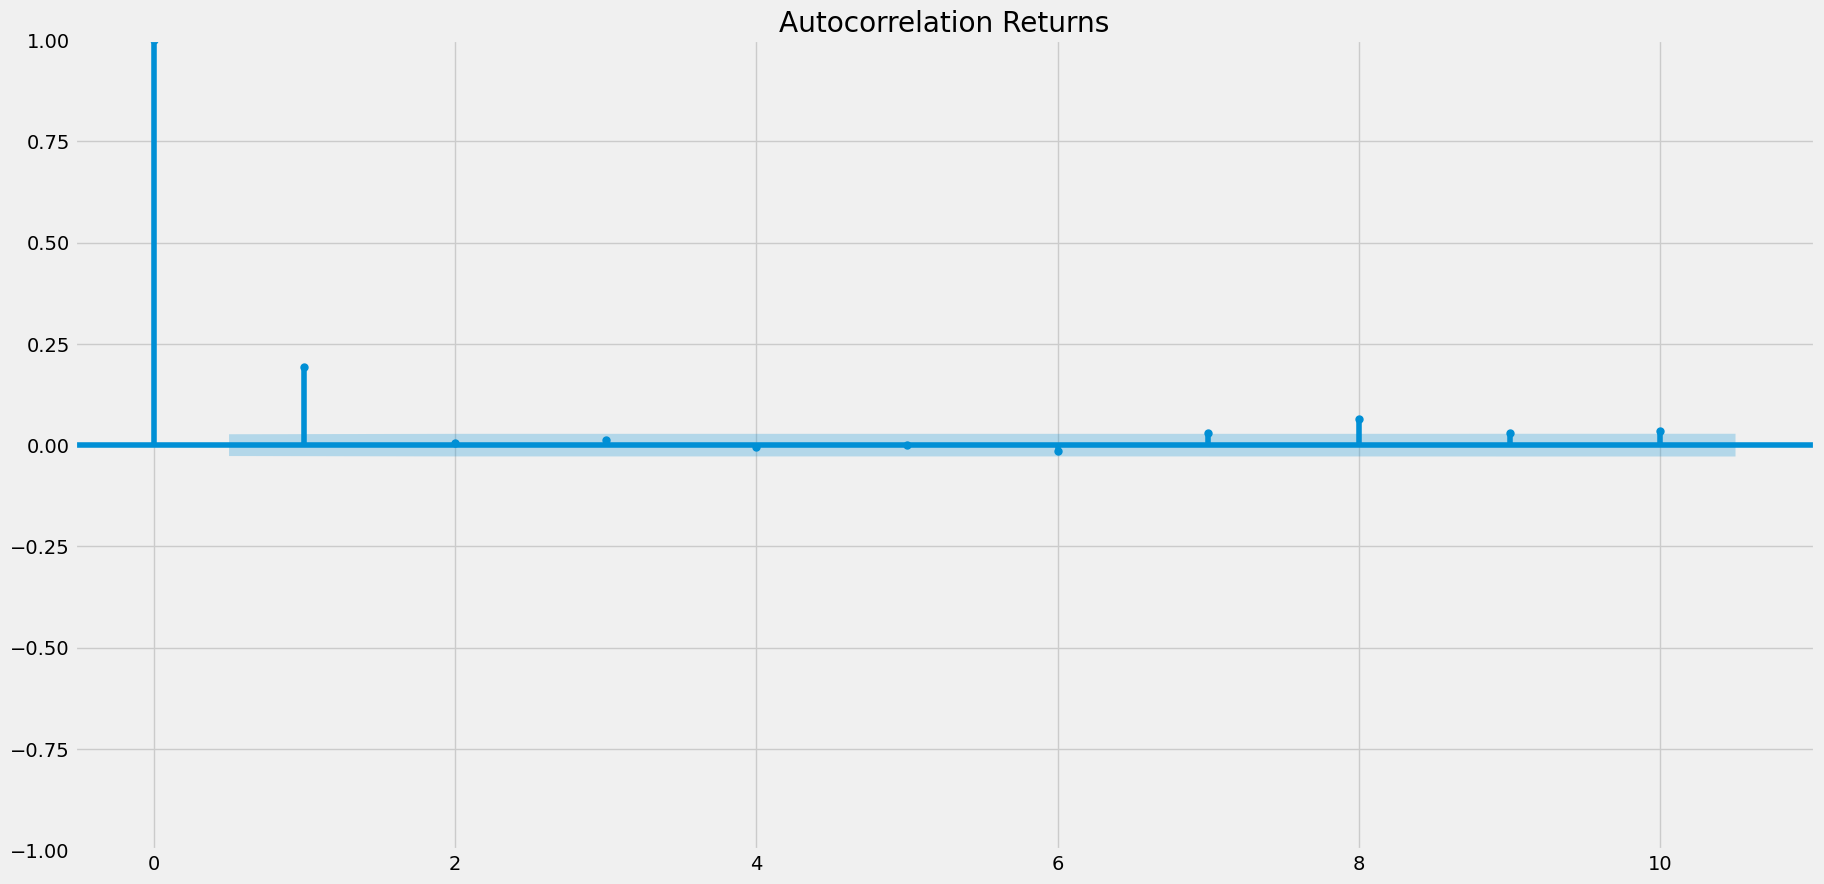

In [4]:
df1 = np.log1p(df.VWAP).diff().dropna()
plot_acf(df1, lags=10, title="Autocorrelation Returns")
plt.show()

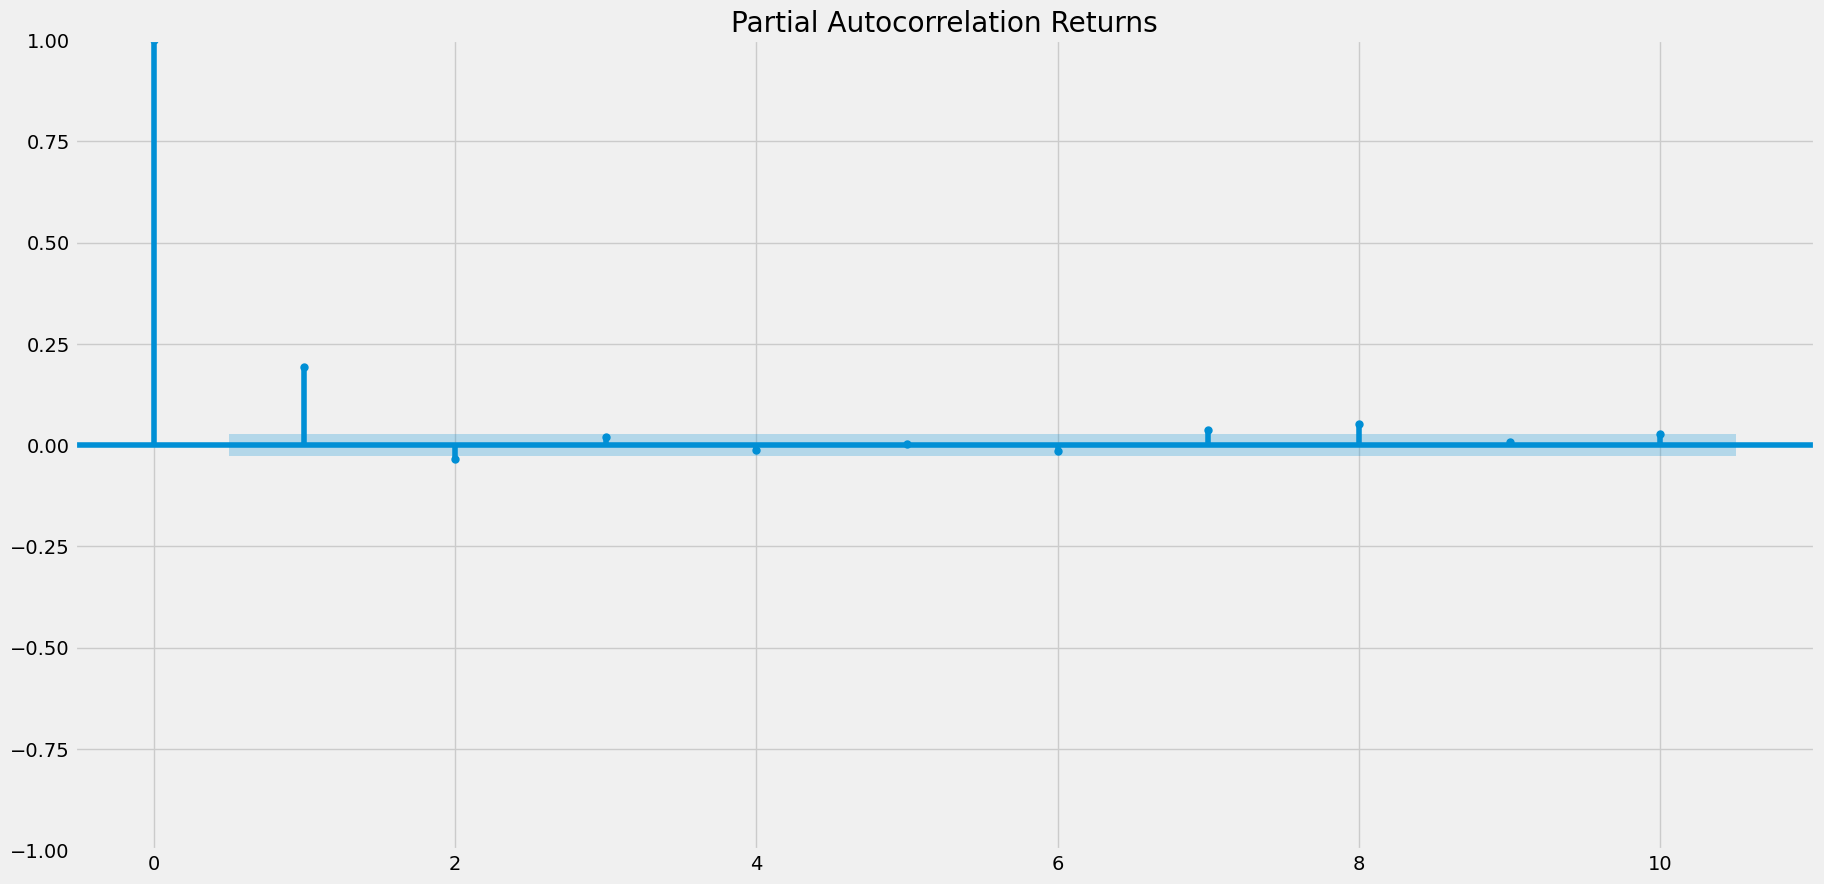

In [5]:
plot_pacf(df1, lags=10, title="Partial Autocorrelation Returns")
plt.show()

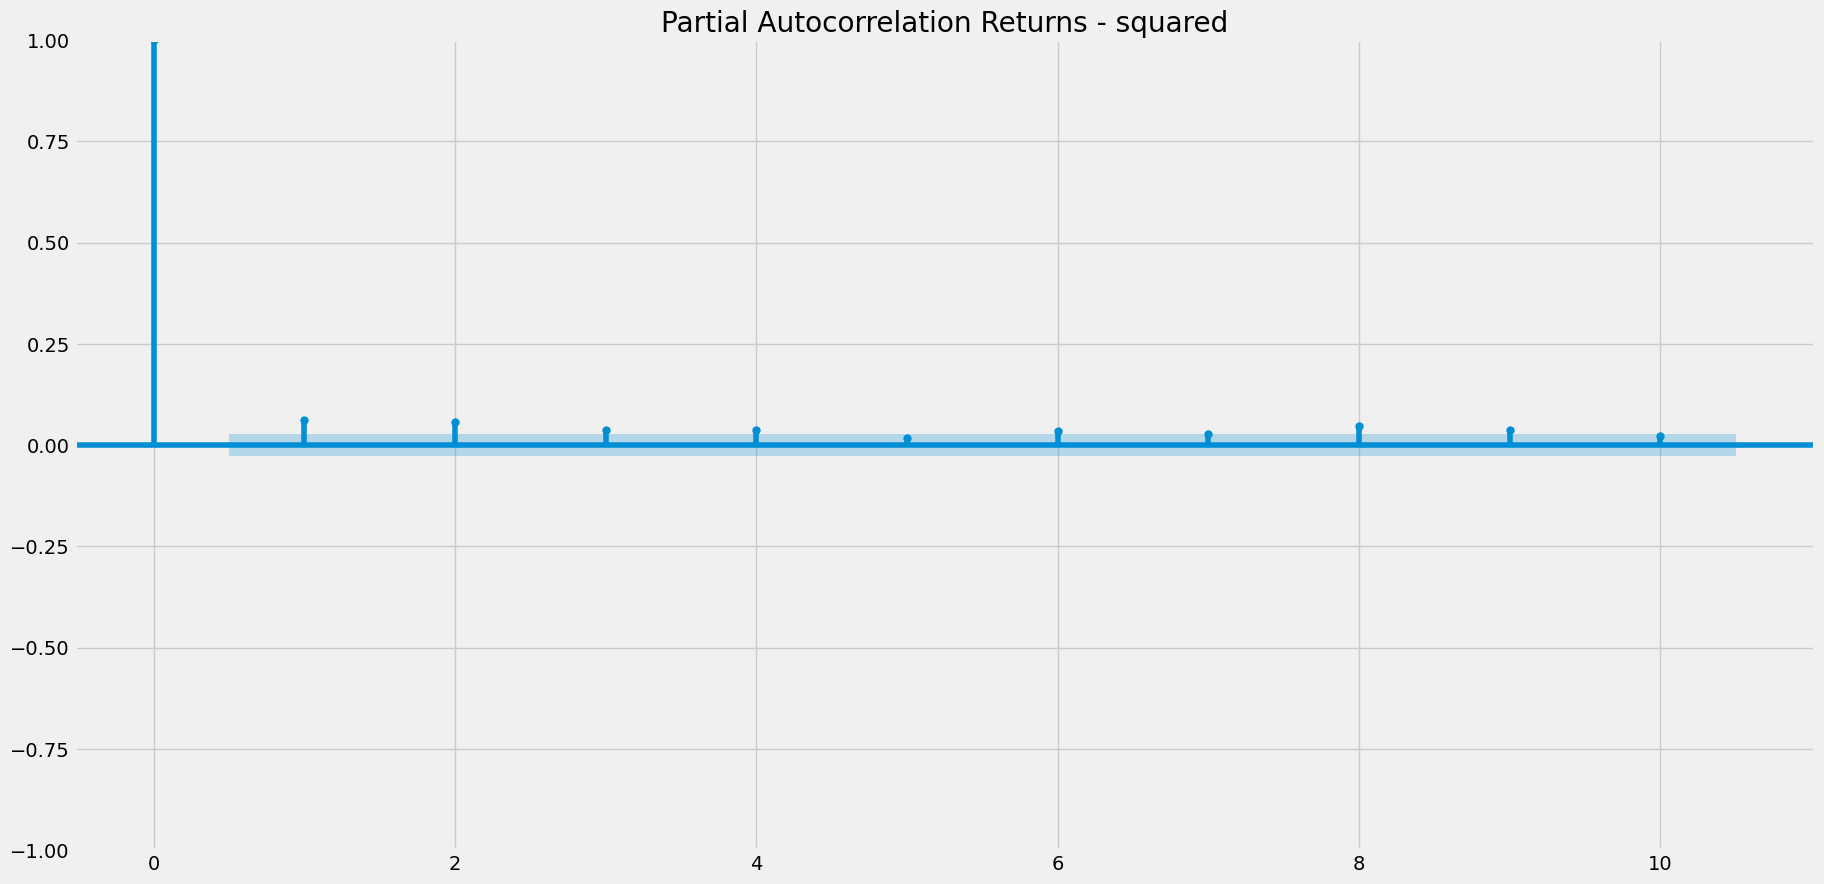

In [6]:
plot_pacf(df1**2, lags=10, title="Partial Autocorrelation Returns - squared")
plt.show()

In [15]:
from arch import arch_model

am = arch_model(100* df1, p=1, q=0)
res = am.fit(update_freq=5)
print(res.summary)

Iteration:      5,   Func. Count:     32,   Neg. LLF: 12129.135686174186
Optimization terminated successfully    (Exit mode 0)
            Current function value: 12129.106672226982
            Iterations: 8
            Function evaluations: 43
            Gradient evaluations: 8
<bound method ARCHModelResult.summary of                       Constant Mean - ARCH Model Results                      
Dep. Variable:                   VWAP   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -12129.1
Distribution:                  Normal   AIC:                           24264.2
Method:            Maximum Likelihood   BIC:                           24283.9
                                        No. Observations:                 5305
Date:                Sat, Oct 29 2022   Df Residuals:                     5304
Time:                        20:06:45   Df Mod

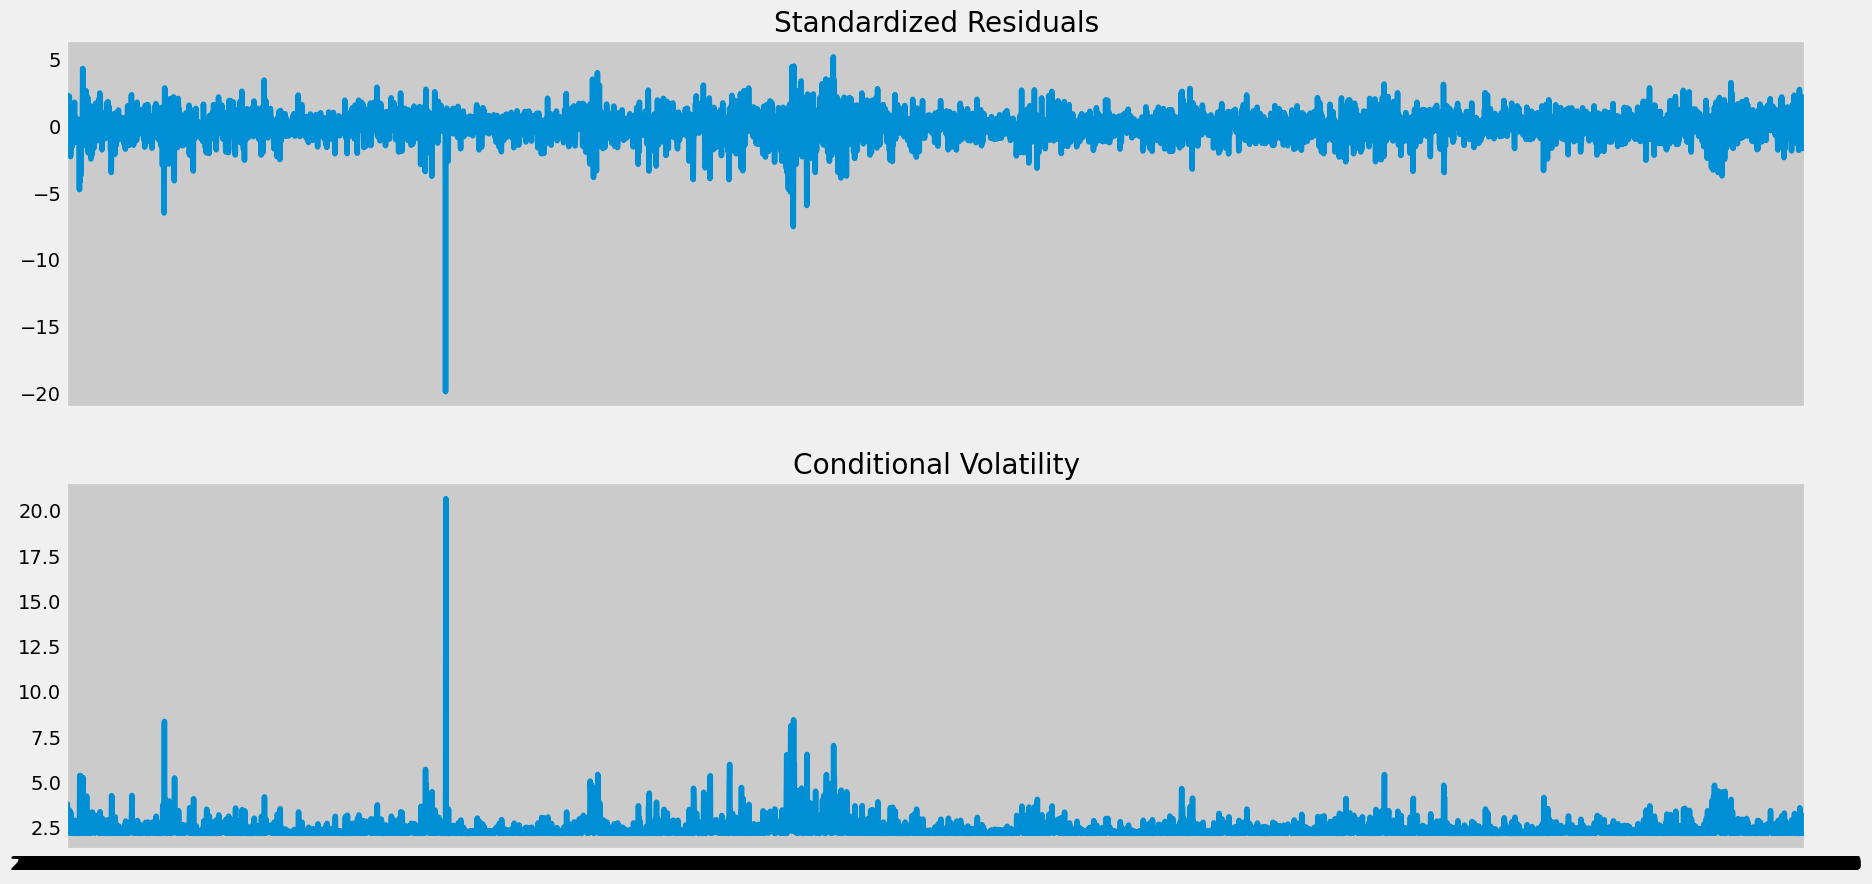

In [7]:
res.plot()
plt.show()

In [8]:
max_lags = 5
residual = res.resid
st_residual = np.divide(res.resid, res.conditional_volatility)

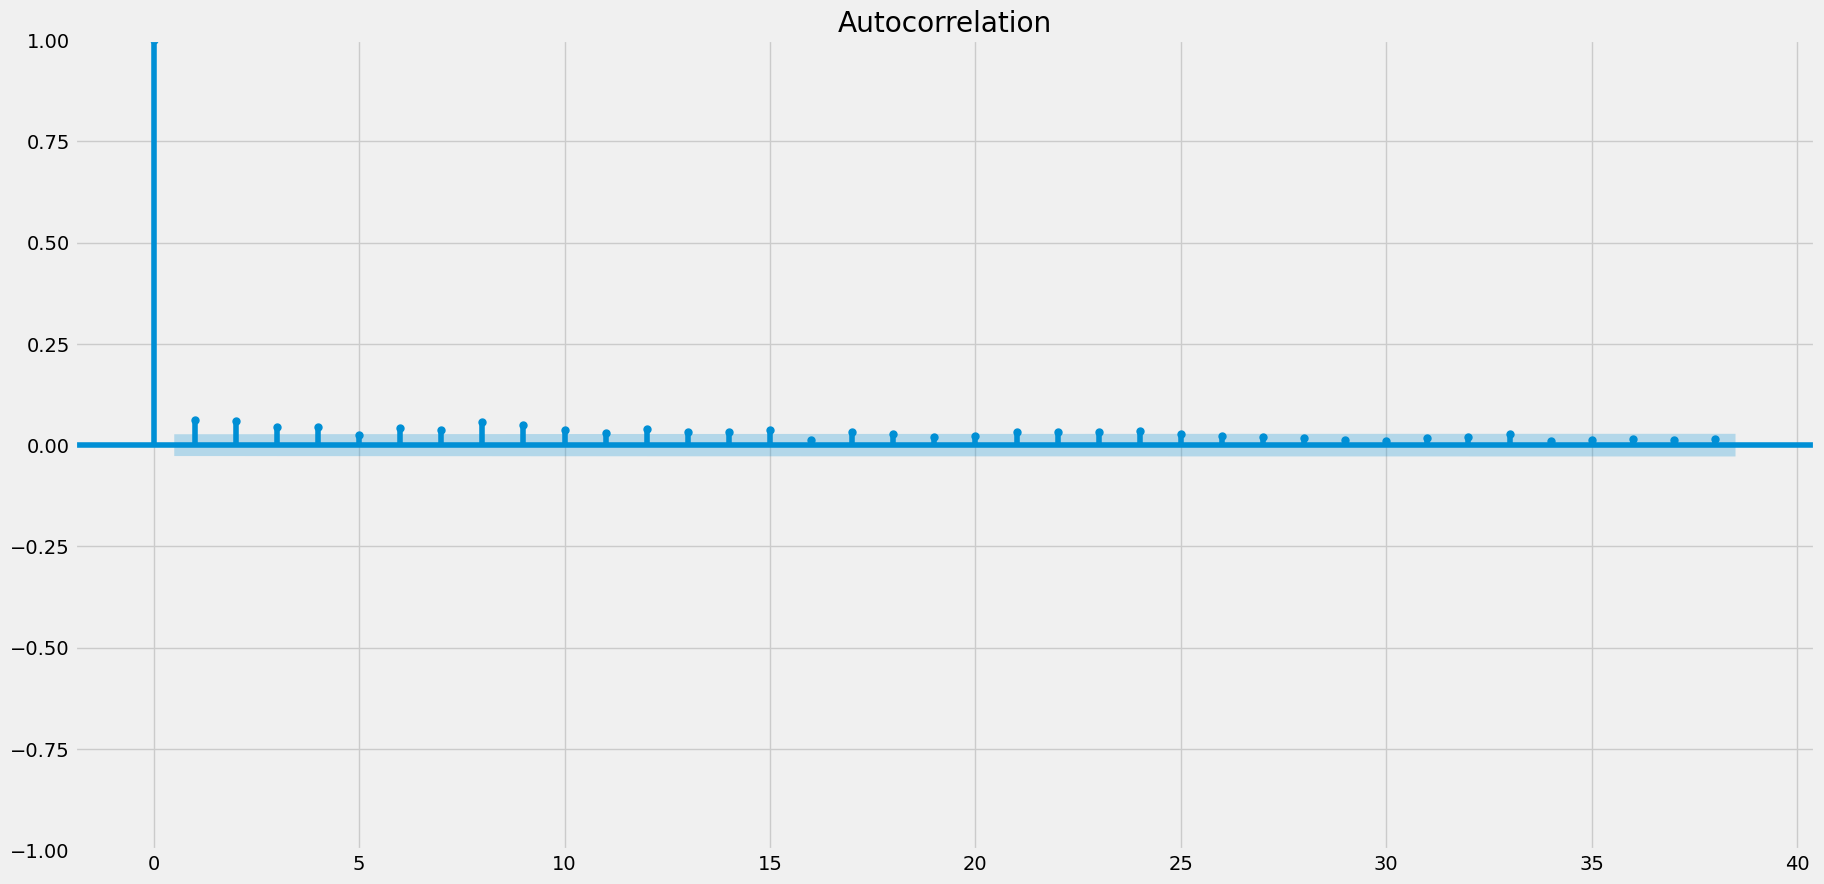

In [9]:
plot_acf(df1 **2)
plt.show()

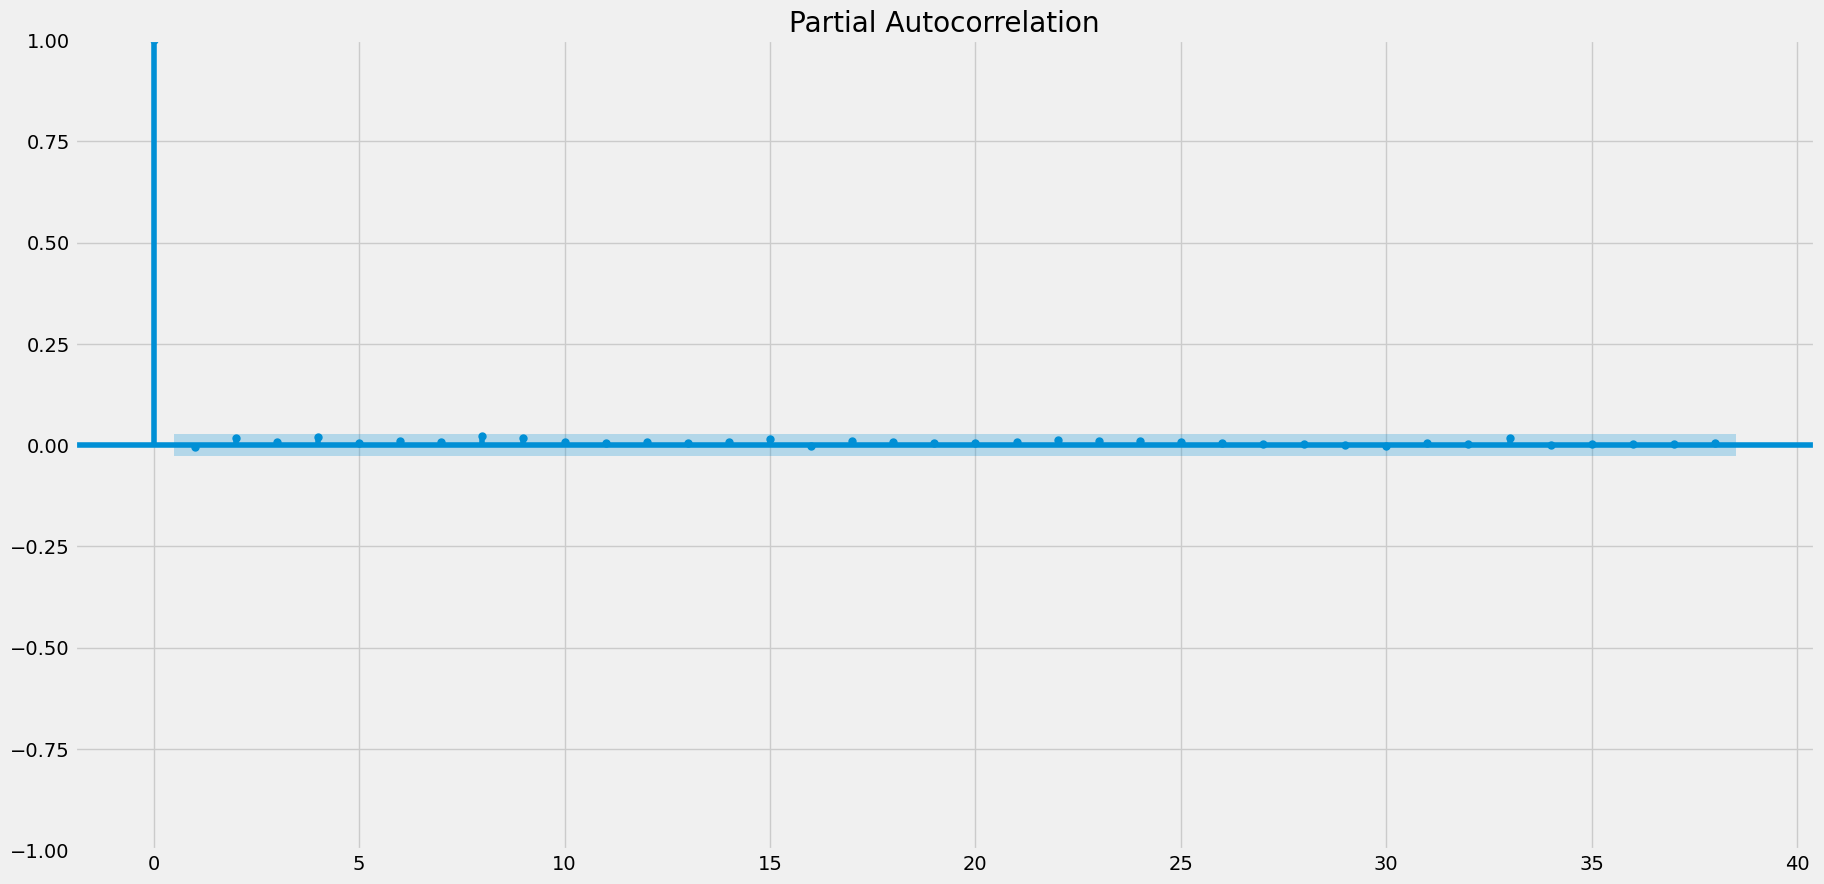

In [16]:
plot_pacf(st_residual ** 2)
plt.show()

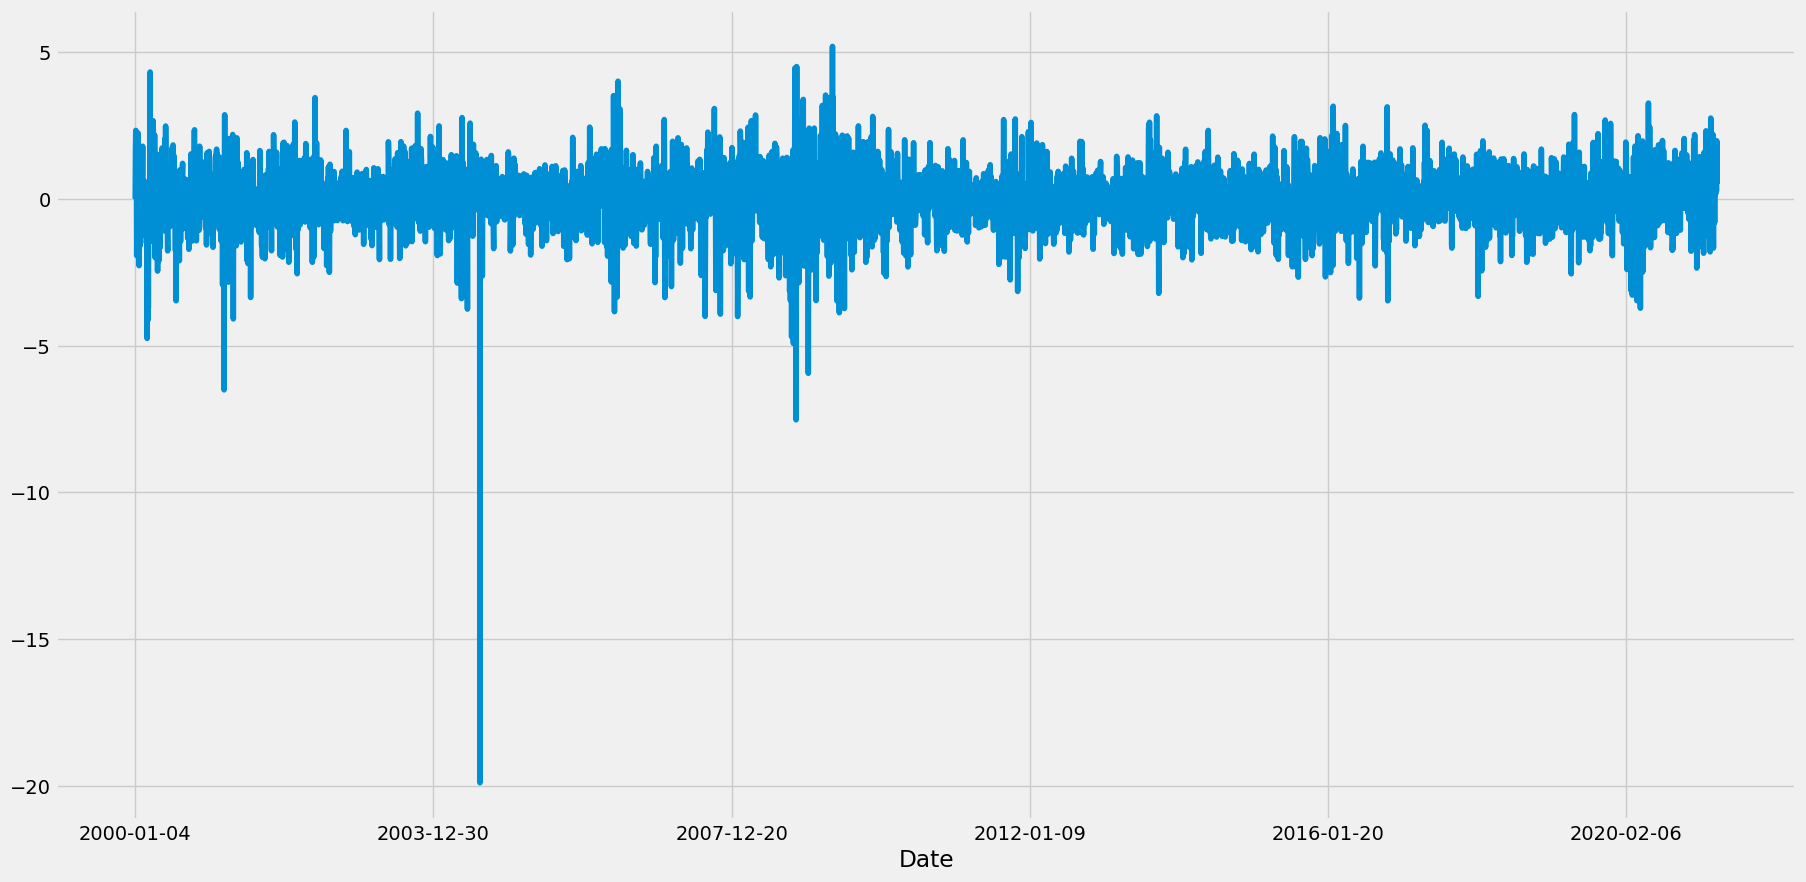

In [14]:
st_residual.plot()
plt.show()

In [22]:
lb_test = acorr_ljungbox(df1**2, lags=max_lags)
for lag in range(1,max_lags):
    print('lag: '+ str(lag) + ' pval: '+ str(np.round(lb_test['lb_pvalue'][lag], 4)))

lag: 1 pval: 0.0
lag: 2 pval: 0.0
lag: 3 pval: 0.0
lag: 4 pval: 0.0


In [17]:
lb_test = acorr_ljungbox(st_residual **2, lags=max_lags)
for lag in range(1, max_lags+1):
    print('lag: ', str(lag), " ", 'pval: ', str(np.round(lb_test['lb_pvalue'][lag], 4)))

lag:  1   pval:  0.7807
lag:  2   pval:  0.4318
lag:  3   pval:  0.5617
lag:  4   pval:  0.4001
lag:  5   pval:  0.5123


In [19]:
etest = het_arch(df1, maxlag=5)
etest

(52.61006823525225,
 4.0440134592476395e-10,
 10.615475688263068,
 3.648198341246663e-10)

In [20]:
etest = het_arch(st_residual, maxlag=5)
etest

(4.210753224066332, 0.5194888708487102, 0.8418661139802547, 0.5197552655404203)

GARCH: Generalized AutoRegressive Conditional Heteroskedasticity

In [21]:
gm = arch_model(100*df1, p=1, q=1)
res = gm.fit(update_freq=5)
print(res.summary())

Iteration:      5,   Func. Count:     34,   Neg. LLF: 11838.065687370981
Iteration:     10,   Func. Count:     65,   Neg. LLF: 11835.563473389308
Optimization terminated successfully    (Exit mode 0)
            Current function value: 11835.561776956452
            Iterations: 13
            Function evaluations: 79
            Gradient evaluations: 13
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                   VWAP   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -11835.6
Distribution:                  Normal   AIC:                           23679.1
Method:            Maximum Likelihood   BIC:                           23705.4
                                        No. Observations:                 5305
Date:                Sat, Oct 29 2022   Df Residuals:                     5304
Time:       

In [22]:
residual = res.resid
st_residual = np.divide(res.resid, res.conditional_volatility)
lb_test = acorr_ljungbox(df1 ** 2, lags=max_lags)
lb_test

,lb_stat,lb_pvalue
1,19.964970,7.887399e-06
2,38.996594,3.404060e-09
3,49.365869,1.090274e-10
4,59.783425,3.221337e-12
5,63.367823,2.442687e-12


In [23]:
lb_test = acorr_ljungbox(st_residual ** 2, lags=max_lags)
lb_test

,lb_stat,lb_pvalue
1,0.179412,0.671879
2,0.272708,0.872534
3,0.314270,0.957323
4,0.318525,0.988587
5,0.349111,0.996616


In [25]:
etest = het_arch(df1, maxlag = 5)
etest

(52.61006823525225,
 4.0440134592476395e-10,
 10.615475688263068,
 3.648198341246663e-10)

In [26]:
etest = het_arch(st_residual, maxlag = 5)
etest

(0.3483349905510802,
 0.9966339975860266,
 0.0695927036922567,
 0.9966405248602166)

In [27]:
from arch.univariate import ARX

ar = ARX(100*df1, lags=[1,3])
print(ar.fit().summary())

                     AR - Constant Variance Model Results                     
Dep. Variable:                   VWAP   R-squared:                       0.038
Mean Model:                        AR   Adj. R-squared:                  0.037
Vol Model:          Constant Variance   Log-Likelihood:               -12185.4
Distribution:                  Normal   AIC:                           24378.9
Method:            Maximum Likelihood   BIC:                           24405.2
                                        No. Observations:                 5302
Date:                Sat, Oct 29 2022   Df Residuals:                     5299
Time:                        21:25:21   Df Model:                            3
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
Const          0.0270  3.328e-02      0.810      0.418 

In [28]:
from arch.univariate import ARCH, GARCH

ar.volatility = GARCH(p=1, q=1)
res = ar.fit(update_freq=0, disp="off")
print(res.summary())

                           AR - GARCH Model Results                           
Dep. Variable:                   VWAP   R-squared:                       0.037
Mean Model:                        AR   Adj. R-squared:                  0.037
Vol Model:                      GARCH   Log-Likelihood:               -11726.4
Distribution:                  Normal   AIC:                           23464.8
Method:            Maximum Likelihood   BIC:                           23504.2
                                        No. Observations:                 5302
Date:                Sat, Oct 29 2022   Df Residuals:                     5299
Time:                        21:28:23   Df Model:                            3
                                  Mean Model                                  
                  coef    std err          t      P>|t|       95.0% Conf. Int.
------------------------------------------------------------------------------
Const           0.0116  3.169e-02      0.365      0.

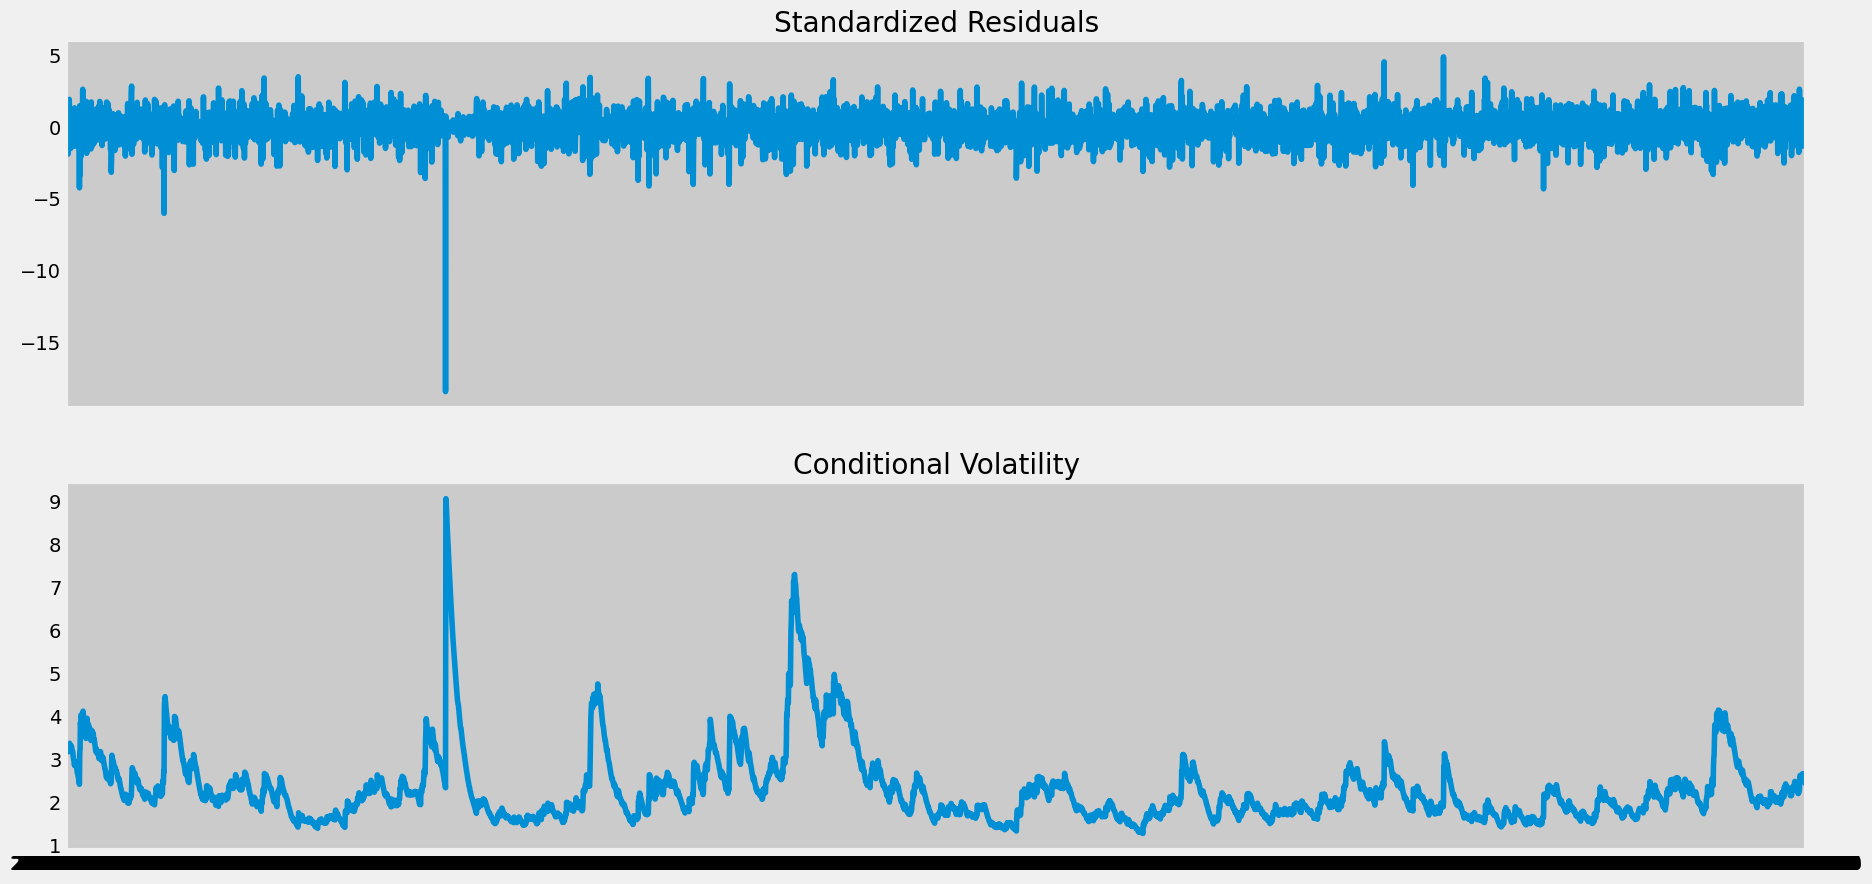

In [29]:
fig = res.plot()
plt.show()

In [30]:
df1 = np.log1p(df.VWAP).diff().dropna()
print(df1.index.min(), df1.index.max())

2000-01-04 2021-04-30


In [31]:
xtr, xval = df1.loc[:'2021-01-01'], df1['2021-01-01':]

In [33]:
ar = ARX(100*df1, lags=[1])
ar.volatility = GARCH(p=1, q=1)
res = ar.fit(update_freq=0, disp="off")
print(res.summary())

                           AR - GARCH Model Results                           
Dep. Variable:                   VWAP   R-squared:                       0.037
Mean Model:                        AR   Adj. R-squared:                  0.037
Vol Model:                      GARCH   Log-Likelihood:               -11732.6
Distribution:                  Normal   AIC:                           23475.1
Method:            Maximum Likelihood   BIC:                           23508.0
                                        No. Observations:                 5304
Date:                Sat, Oct 29 2022   Df Residuals:                     5302
Time:                        21:35:35   Df Model:                            2
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
Const          0.0123  3.162e-02      0.389      0.698 

In [34]:
xfor = res.forecast(horizon=xval.shape[0])
mean_forecast = xfor.mean.tail(1).values.reshape(len(xval), 1)

forecast = pd.DataFrame()
forecast['Date'] = xval.index
forecast['VWAP'] = xval.values
forecast['fc_mean'] = xfor.mean.tail(1).values.reshape(len(xval),1)
forecast['fc_std']  = np.sqrt(xfor.variance.tail(1).values.reshape(len(xval),1))


,Date,VWAP,fc_mean,fc_std
0,2021-01-01,-0.000635,0.334444,2.467756
1,2021-01-04,0.044198,0.080492,2.520787
2,2021-01-05,0.013379,0.028705,2.525199
3,2021-01-06,0.003357,0.018144,2.527605
4,2021-01-07,0.048117,0.015991,2.529918
...,...,...,...,...
75,2021-04-26,0.013062,0.015439,2.672756
76,2021-04-27,0.023504,0.015439,2.674503
77,2021-04-28,0.006857,0.015439,2.676243
78,2021-04-29,0.043910,0.015439,2.677977


<AxesSubplot: >

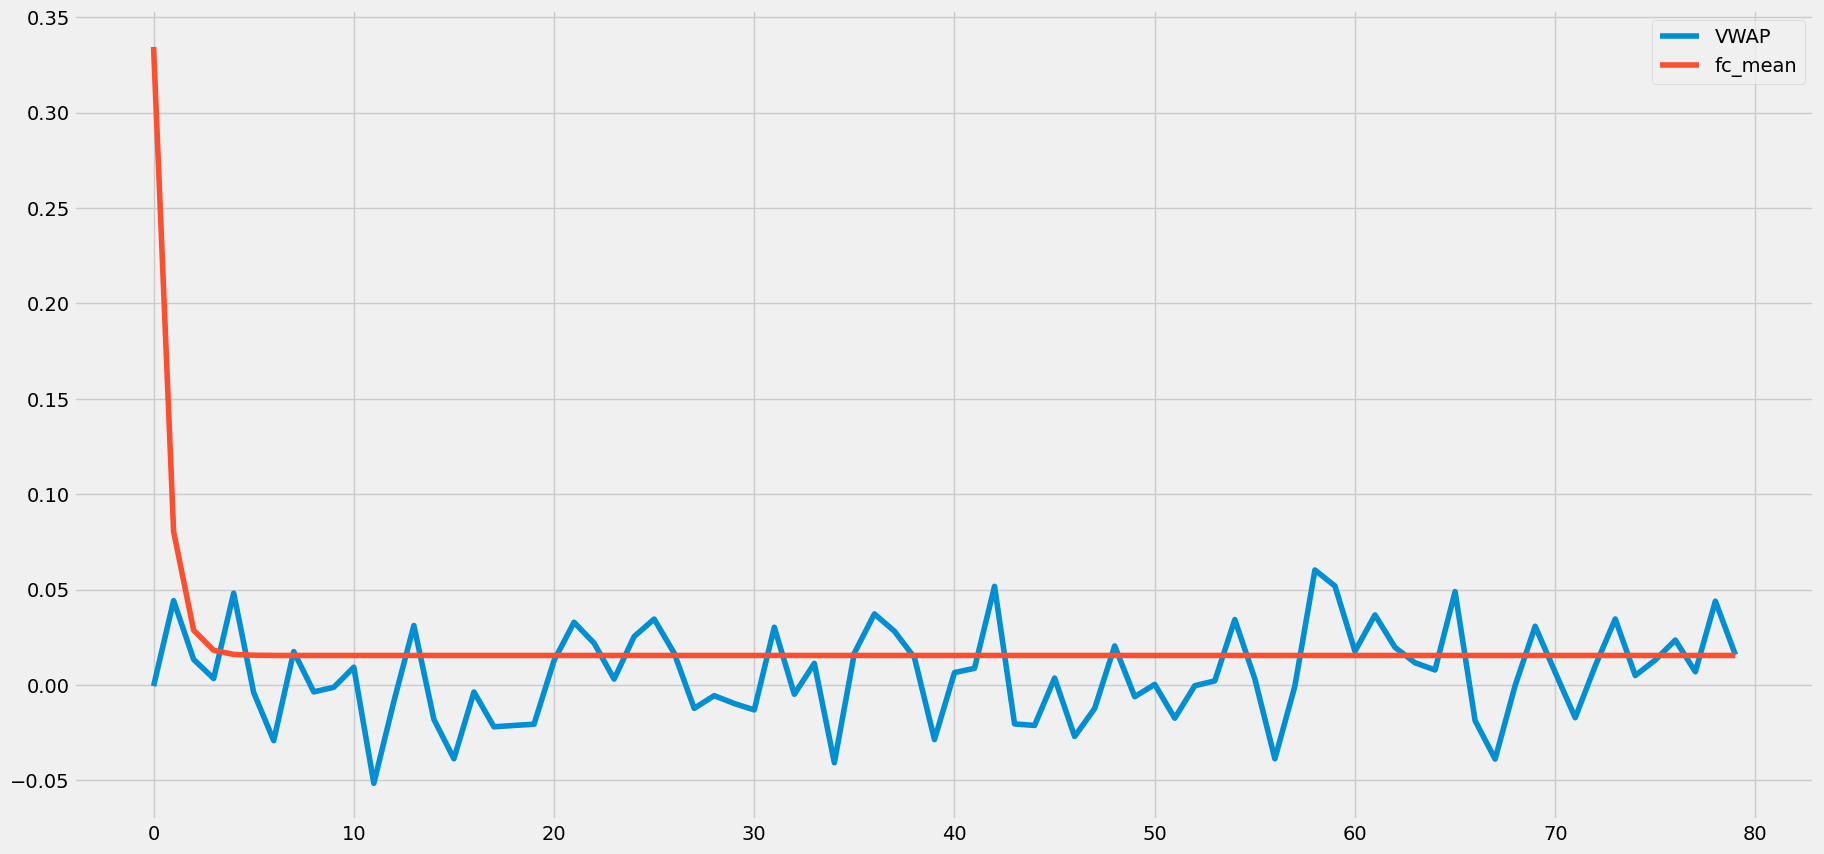

In [36]:
forecast.set_index('Date')
forecast[['VWAP', 'fc_mean']].plot()

In [40]:
import arch.data.sp500

data = arch.data.sp500.load()
market = data['Adj Close']
returns = 100 * market.pct_change().dropna()

In [41]:
am = arch_model(returns, vol='GARCH', p=1, o=0, q=1, dist="skewt")
res = am.fit(disp="off", last_obs="2017-12-31")

In [42]:
forecasts = res.forecast(start="2018-1-1", reindex=False)
cond_mean = forecasts.mean["2018":]
cond_var  = forecasts.variance["2018":]
q = am.distribution.ppf([0.01, 0.05], res.params[-2:])

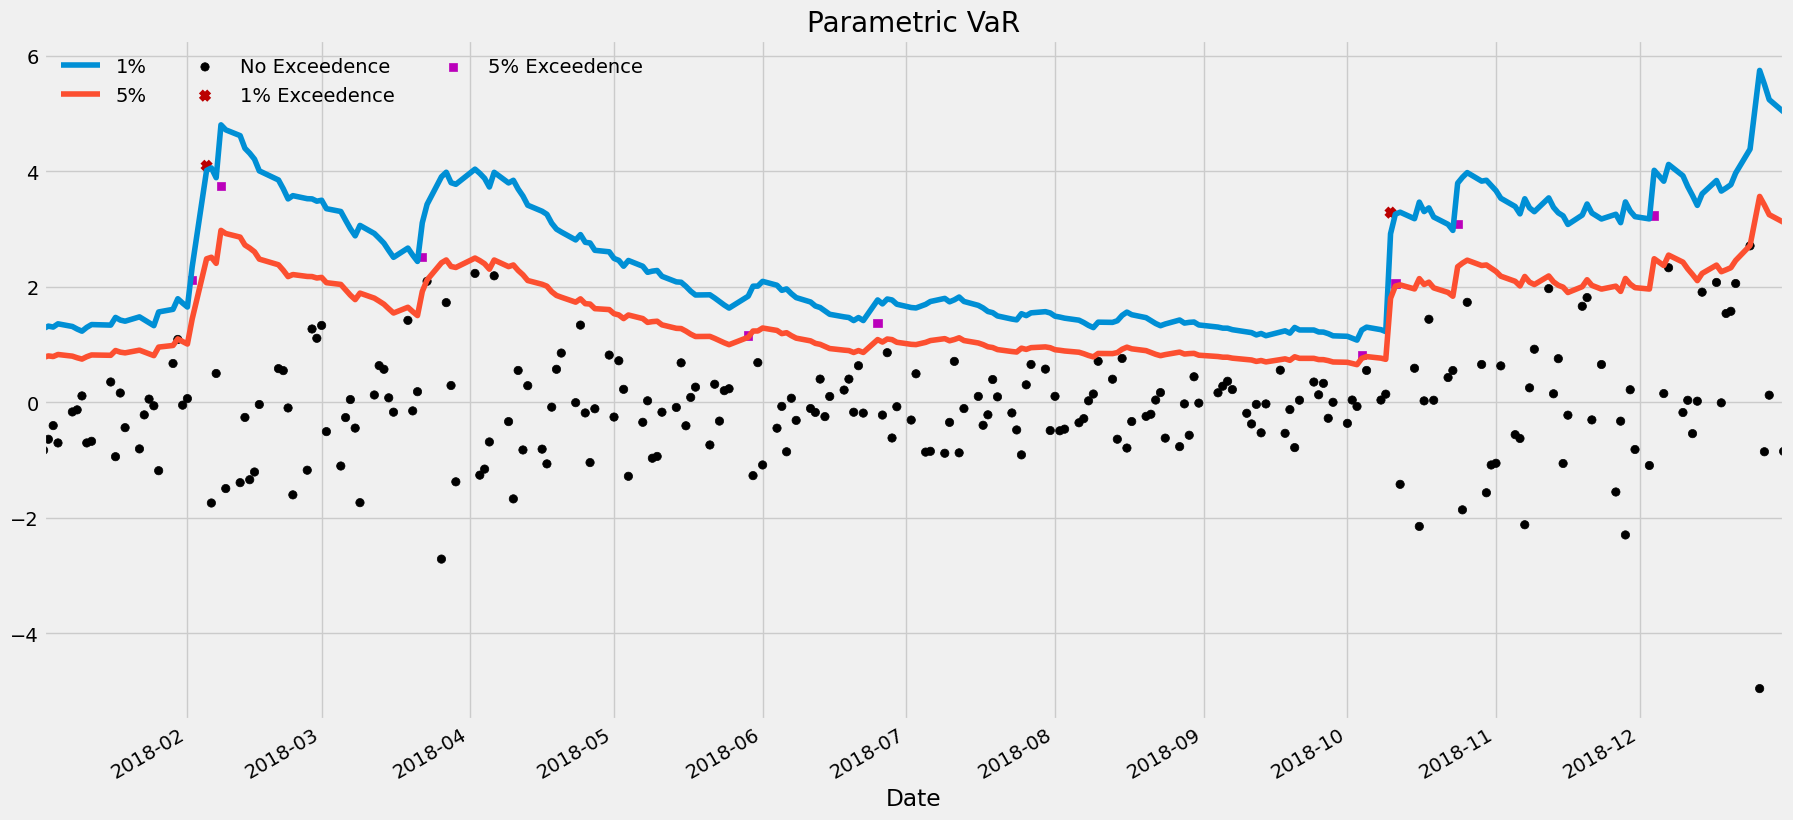

In [45]:
value_at_risk = -cond_mean.values - np.sqrt(cond_var).values * q[None, :]
value_at_risk = pd.DataFrame(value_at_risk, columns=["1%", "5%"], index=cond_var.index)
ax = value_at_risk.plot(legend=False)
xl = ax.set_xlim(value_at_risk.index[0], value_at_risk.index[-1])
rets_2018 = returns["2018":].copy()
rets_2018.name = "S&P 500 Return"
c = []
for idx in value_at_risk.index:
    if rets_2018[idx] > -value_at_risk.loc[idx, "5%"]:
        c.append("#000000")
    elif rets_2018[idx] < -value_at_risk.loc[idx, "1%"]:
        c.append("#BB0000")
    else:
        c.append("#BB00BB")
c = np.array(c, dtype="object")
labels = {"#BB0000": "1% Exceedence", "#BB00BB": "5% Exceedence", "#000000": "No Exceedence",}
markers = {"#BB0000": "x", "#BB00BB": "s", "#000000": "o"}
for color in np.unique(c):
    sel = c == color
    ax.scatter(
        rets_2018.index[sel],
        -rets_2018.loc[sel],
        marker=markers[color],
        c=c[sel],
        label=labels[color],
    )
ax.set_title("Parametric VaR")
leg = ax.legend(frameon=False, ncol=3)

In [47]:
cond_var

,h.1
Date,
2018-01-02,0.253515
2018-01-03,0.269368
2018-01-04,0.262848
2018-01-05,0.285186
2018-01-08,0.266836
...,...
2018-12-24,2.817371
2018-12-26,4.813406
2018-12-27,4.421913
